In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.integrate import solve_ivp
import seaborn as sns
import numpy as np
from decimal import Decimal

## FDM for Parabolic Equations
Using second order central difference for u_xx and forward euler method for u_t

U_n+1 = U_n + delta_t * ((delta_h / h**2) * U_n + F_n)

### Equations

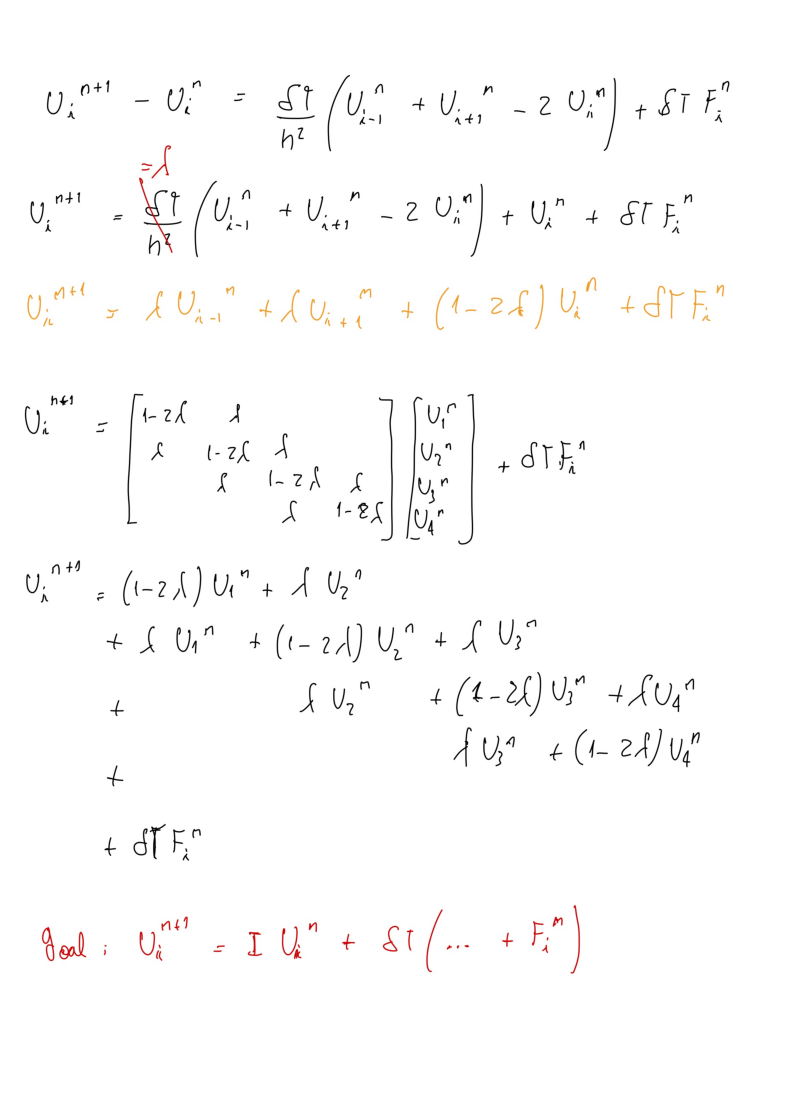

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10,30))
img = mpimg.imread(f"imgs/fdm1-7.jpg")
axs.imshow(img)
axs.set_axis_off()
plt.show()

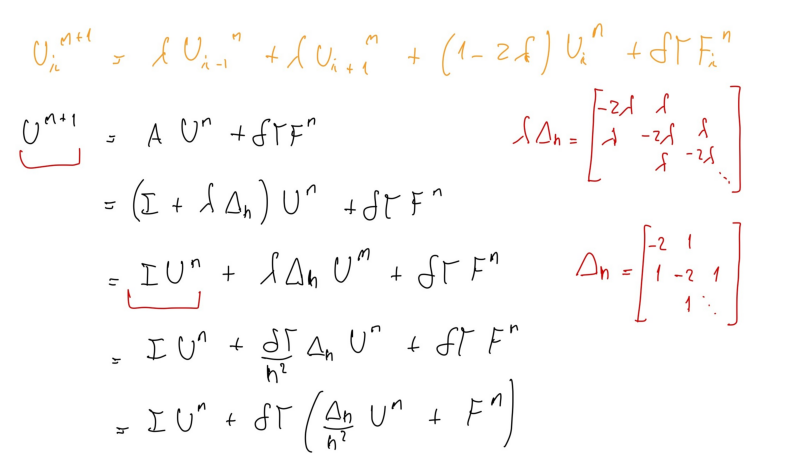

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(10,30))
img = mpimg.imread(f"imgs/fdm2-8.jpg")
axs.imshow(img)
axs.set_axis_off()
plt.show()

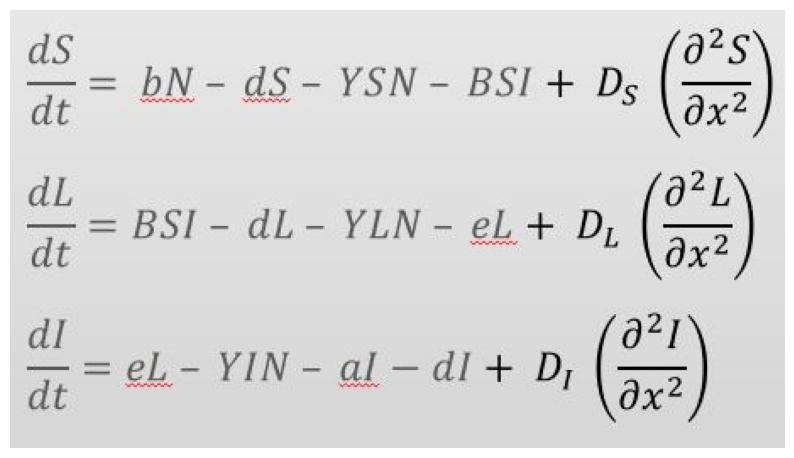

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(10,30))
img = mpimg.imread(f"imgs/SLI model with spatial formulation.JPG")
axs.imshow(img)
axs.set_axis_off()
plt.show()

### Algorithm implementation (this section is wrong, see notebook 07)

In [6]:
# def sli_with_spatial_terms_model(t, y, b, d, B, Y, a, e):
#     """
#     Parameters
#     ----------
#     b: Birth rate
#     d: Natural death rate
#     B: Infection rate
#     Y: Parameter to take into account density dependent reduction in population
#     a: Death rate due to infection
#     e: Rate of individuals that turn infective
#     """
#     global ENABLE_SPATIAL_DOMAIN_TERMS
#     global divisions_x, matrix_factor
#     global dS_dt_prev, dL_dt_prev, dI_dt_prev

#     S, L, I = y[:divisions_x], y[divisions_x:2*divisions_x], y[2*divisions_x:]
#     N = S + L + I
    
#     # if t < 0.00025:
#     #     print(t, S[0], L[0], I[0])
#     #     print(dS_dt_prev[0], dL_dt_prev[0], dI_dt_prev[0])
#     #     print(matrix_factor.dot(dS_dt_prev)[0])
#     #     print()

#     dS_dt = b * N - d * S - Y * S * N - B * S * I
#     dL_dt = B * S * I - d * L - Y * L * N - e * L
#     dI_dt = e * L - Y * I * N - a * I - d * I

#     # print(dS_dt[0])
    
#     if ENABLE_SPATIAL_DOMAIN_TERMS:
#         # 0.5 is the diffusion rate D_j
#         dS_dt += matrix_factor.dot(dS_dt_prev)
#         dL_dt += matrix_factor.dot(dL_dt_prev)
#         dI_dt += matrix_factor.dot(dI_dt_prev)
    
#     # print(dS_dt[0])
#     # print()

#     dS_dt_prev = dS_dt
#     dL_dt_prev = dL_dt
#     dI_dt_prev = dI_dt
    
#     return np.concatenate([dS_dt, dL_dt, dI_dt])

In [43]:
# """Flags"""
# ENABLE_SPATIAL_DOMAIN_TERMS = True

# """Spatial domain range (0, x_max), and grid size (h) for the second order central diffence (FDM)

# 'delta_t' and 't' will be determined by the solver
# """
# diffusion_rate = 0.5
# delta_x = 10
# max_x = 1000
# max_t = 15
# if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
#     raise ValueError("max_x must be multiple of delta_x")
# x = np.arange(0, max_x + delta_x, delta_x)
# divisions_x = x.size - 1
# delta_h = np.eye(divisions_x, divisions_x, 0) * -2 \
#             + np.eye(divisions_x, divisions_x, -1) \
#             + np.eye(divisions_x, divisions_x, 1)
# matrix_factor = (diffusion_rate / delta_x**2) * delta_h
# # print(delta_h)

# """Solver"""
# max_delta_t = delta_x**2 / 2
# # print(max_delta_t)

# """These global arrays will keep track of the last d*/dt from the previous iteration"""
# dS_dt_prev = np.zeros(divisions_x)
# dL_dt_prev = np.zeros(divisions_x)
# dI_dt_prev = np.zeros(divisions_x)

# """Initial S: 45, L:5, I:0 for t0 = 0 and x0 = 0"""
# y0 = np.concatenate([
#     np.array([45]), np.array([0]*(divisions_x-1)),
#     np.array([5]), np.array([0]*(divisions_x-1)),
#     np.array([0]), np.array([0]*(divisions_x-1)),
#     ])

# """F parameters (check function 'sli_with_spatial_terms_model' docstring for an explanation)"""
# b = 0.39
# d = 0.125
# B = 0.6
# Y = 0.01
# a = 0.9
# e = 0.3

# sol = solve_ivp(
#     fun=sli_with_spatial_terms_model,
#     t_span=[0, max_t],
#     t_eval=np.linspace(0, max_t, 1000),
#     y0=y0,
#     args=(b, d, B, Y, a, e),
#     max_step=max_delta_t
#     )

[]

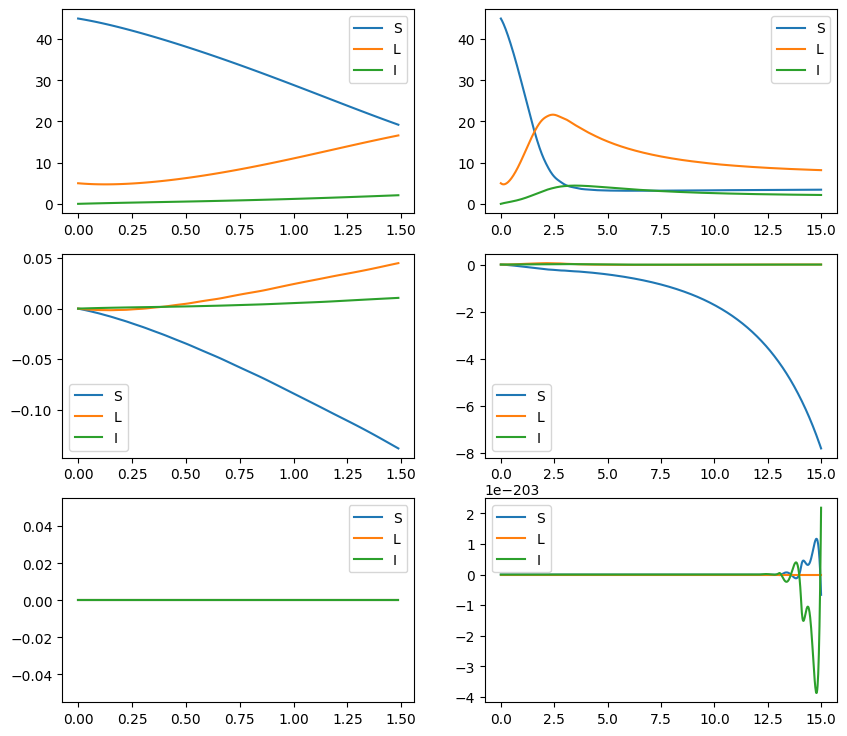

In [44]:
# fig, ax = plt.subplots(3,2, figsize=(10,9))
# S, L, I = sol.y[:divisions_x,:], sol.y[divisions_x:2*divisions_x,:], sol.y[2*divisions_x:,:]
# sns.lineplot(x=sol.t[:100], y=S[0][:100], label="S", ax=ax[0, 0])
# sns.lineplot(x=sol.t[:100], y=L[0][:100], label="L", ax=ax[0, 0])
# sns.lineplot(x=sol.t[:100], y=I[0][:100], label="I", ax=ax[0, 0])
# sns.lineplot(x=sol.t, y=S[0], label="S", ax=ax[0, 1])
# sns.lineplot(x=sol.t, y=L[0], label="L", ax=ax[0, 1])
# sns.lineplot(x=sol.t, y=I[0], label="I", ax=ax[0, 1])
# sns.lineplot(x=sol.t[:100], y=S[1][:100], label="S", ax=ax[1, 0])
# sns.lineplot(x=sol.t[:100], y=L[1][:100], label="L", ax=ax[1, 0])
# sns.lineplot(x=sol.t[:100], y=I[1][:100], label="I", ax=ax[1, 0])
# sns.lineplot(x=sol.t, y=S[1], label="S", ax=ax[1, 1])
# sns.lineplot(x=sol.t, y=L[1], label="L", ax=ax[1, 1])
# sns.lineplot(x=sol.t, y=I[1], label="I", ax=ax[1, 1])
# sns.lineplot(x=sol.t[:100], y=S[-1][:100], label="S", ax=ax[2, 0])
# sns.lineplot(x=sol.t[:100], y=L[-1][:100], label="L", ax=ax[2, 0])
# sns.lineplot(x=sol.t[:100], y=I[-1][:100], label="I", ax=ax[2, 0])
# sns.lineplot(x=sol.t, y=S[-1], label="S", ax=ax[2, 1])
# sns.lineplot(x=sol.t, y=L[-1], label="L", ax=ax[2, 1])
# sns.lineplot(x=sol.t, y=I[-1], label="I", ax=ax[2, 1])
# plt.plot()

## FDM without solve_ivp

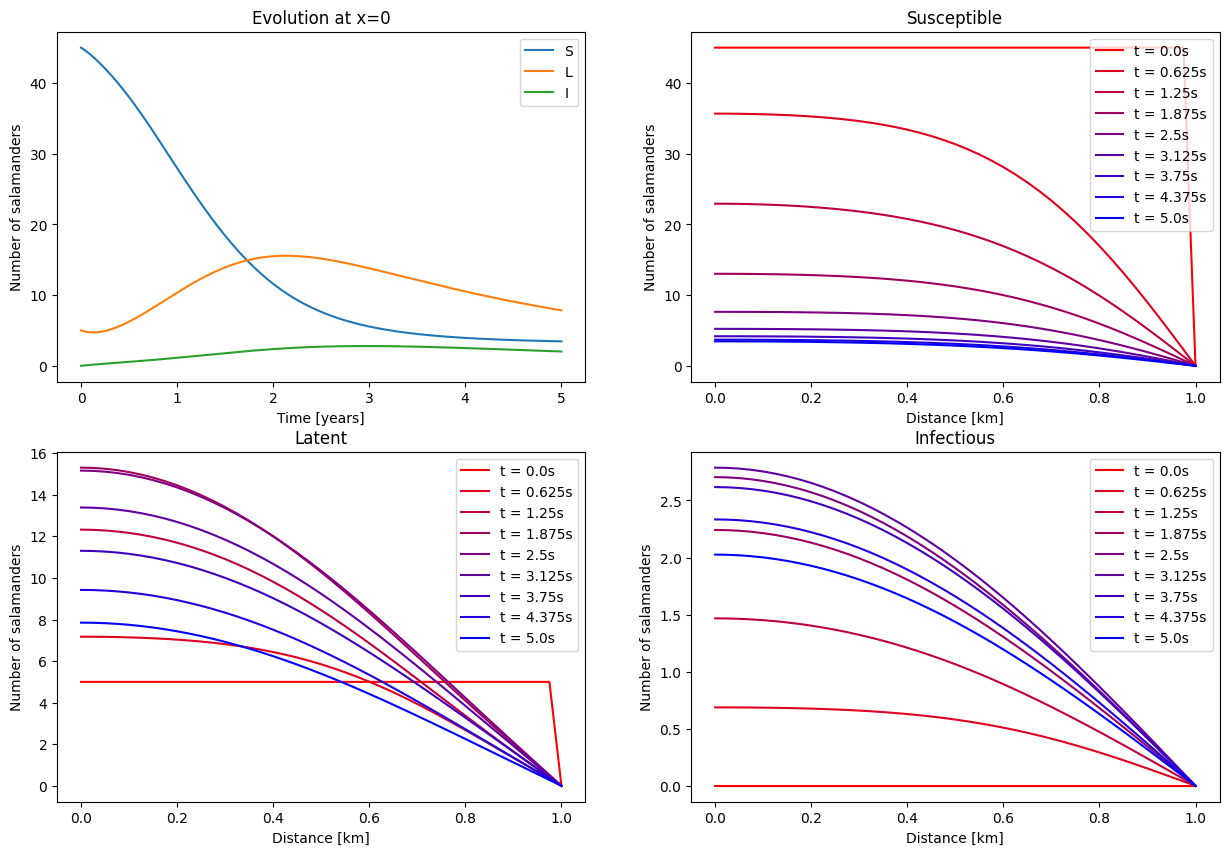

In [31]:
b = 0.39
d = 0.125
B = 0.6
Y = 0.01
a = 0.9
e = 0.3

diffusion_rate = 0.1
delta_x = 0.025
delta_t = 0.0025
max_x = 1
max_t = 5
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
initial_condition_S = 45
initial_condition_L = 5
initial_condition_I = 0
boundary_conditions_S = [None, 0]
boundary_conditions_L = [None, 0]
boundary_conditions_I = [None, 0]

S = np.zeros((x.size, t.size))
L = np.zeros((x.size, t.size))
I = np.zeros((x.size, t.size))
S[:, 0] = initial_condition_S
L[:, 0] = initial_condition_L
I[:, 0] = initial_condition_I
S[-1, :] = boundary_conditions_S[1]
L[-1, :] = boundary_conditions_L[1]
I[-1, :] = boundary_conditions_I[1]

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):
    for i in range(1, x.size - 1):
        N = S[i, n] + L[i, n] + I[i, n]
        S[i , n + 1] = factor * S[i - 1, n] \
                        + (1 - 2 * factor) * S[i, n] \
                        + factor * S[i + 1, n] \
                        + delta_t * (b * N - d * S[i, n] - Y * S[i, n] * N - B * S[i, n] * I[i, n])
        L[i , n + 1] = factor * L[i - 1, n] \
                        + (1 - 2 * factor) * L[i, n] \
                        + factor * L[i + 1, n] \
                        + delta_t * (B * S[i, n] * I[i, n] - d * L[i, n] - Y * L[i, n] * N - e * L[i, n])
        I[i , n + 1] = factor * I[i - 1, n] \
                        + (1 - 2 * factor) * I[i, n] \
                        + factor * I[i + 1, n] \
                        + delta_t * (e * L[i, n] - Y * I[i, n] * N - a * I[i, n] - d * I[i, n])

    i = 0
    N = S[i, n] + L[i, n] + I[i, n]
    S[i , n + 1] = factor * S[i + 1, n] \
                        + (1 - 2 * factor) * S[i, n] \
                        + factor * S[i + 1, n] \
                        + delta_t * (b * N - d * S[i, n] - Y * S[i, n] * N - B * S[i, n] * I[i, n])
    L[i , n + 1] = factor * L[i + 1, n] \
                    + (1 - 2 * factor) * L[i, n] \
                    + factor * L[i + 1, n] \
                    + delta_t * (B * S[i, n] * I[i, n] - d * L[i, n] - Y * L[i, n] * N - e * L[i, n])
    I[i , n + 1] = factor * I[i + 1, n] \
                    + (1 - 2 * factor) * I[i, n] \
                    + factor * I[i + 1, n] \
                    + delta_t * (e * L[i, n] - Y * I[i, n] * N - a * I[i, n] - d * I[i, n])

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.lineplot(x=t, y=S[0], label="S", ax=ax[0, 0])
sns.lineplot(x=t, y=L[0], label="L", ax=ax[0, 0])
sns.lineplot(x=t, y=I[0], label="I", ax=ax[0, 0])

for idx, n in enumerate(t):
    if n % plot_every == 0:
        sns.lineplot(x=x, y=S[:, idx],
            color=[R[int(n / plot_every)], G, B[int(n / plot_every)]],
            label=f"t = {np.round(n, 3)}s",
            ax=ax[0, 1])
        sns.lineplot(x=x, y=L[:, idx],
            color=[R[int(n / plot_every)], G, B[int(n / plot_every)]],
            label=f"t = {np.round(n, 3)}s",
            ax=ax[1, 0])
        sns.lineplot(x=x, y=I[:, idx],
            color=[R[int(n / plot_every)], G, B[int(n / plot_every)]],
            label=f"t = {np.round(n, 3)}s",
            ax=ax[1, 1])

ax[0, 0].set_title("Evolution at x=0")
ax[0, 0].set_xlabel("Time [years]")
ax[0, 0].set_ylabel("Number of salamanders")
ax[0, 1].set_title("Susceptible")
ax[0, 1].set_xlabel("Distance [km]")
ax[0, 1].set_ylabel("Number of salamanders")
ax[1, 0].set_title("Latent")
ax[1, 0].set_xlabel("Distance [km]")
ax[1, 0].set_ylabel("Number of salamanders")
ax[1, 1].set_title("Infectious")
ax[1, 1].set_xlabel("Distance [km]")
ax[1, 1].set_ylabel("Number of salamanders")
plt.show()

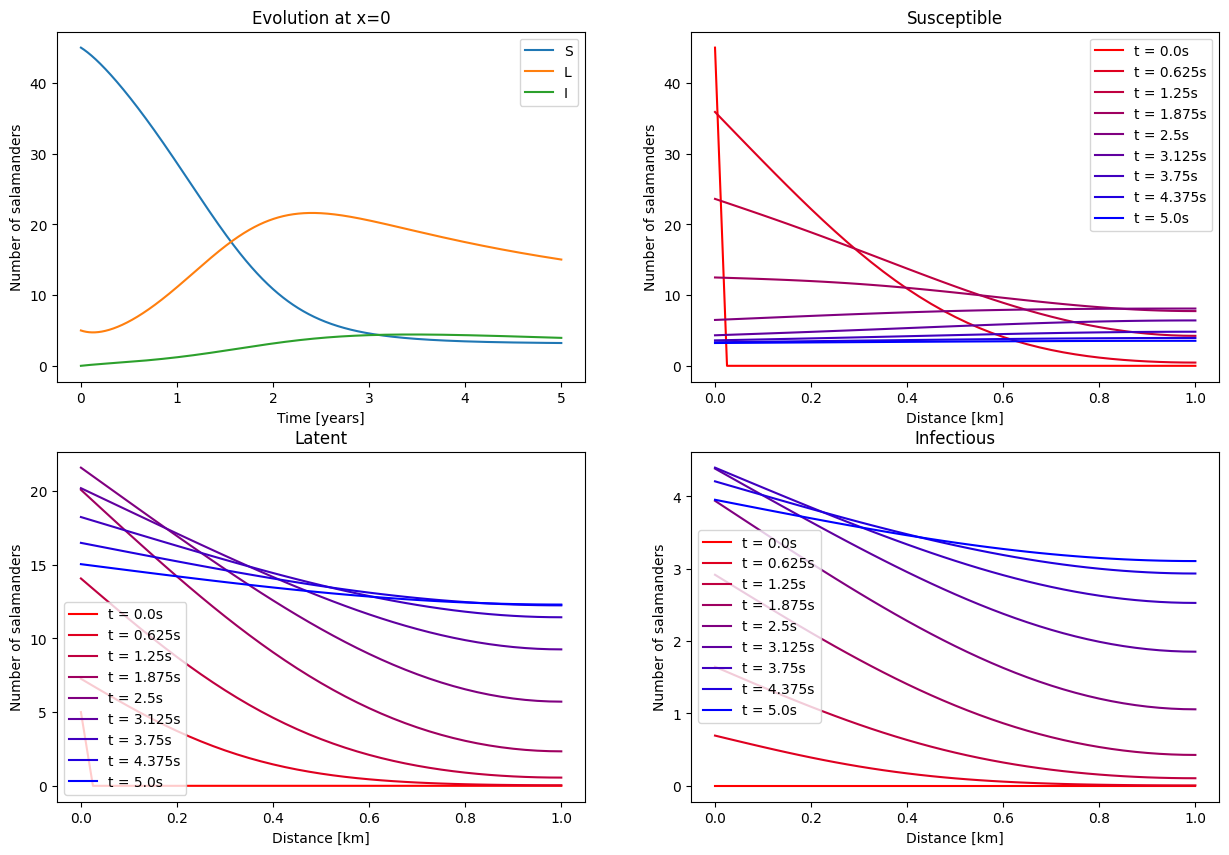

In [10]:
b = 0.39
d = 0.125
B = 0.6
Y = 0.01
a = 0.9
e = 0.3

diffusion_rate = 0.1
delta_x = 0.025
delta_t = 0.0025
max_x = 1
max_t = 5
if Decimal(str(max_x)) % Decimal(str(delta_x)) != 0:
    raise ValueError("max_x must be multiple of delta_x")
if Decimal(str(max_t)) % Decimal(str(delta_t)) != 0:
    raise ValueError("max_t must be multiple of delta_t")
x = np.arange(0, max_x + delta_x, delta_x)
t = np.arange(0, max_t + delta_t, delta_t)
initial_condition_S = 45
initial_condition_L = 5
initial_condition_I = 0

S = np.zeros((x.size, t.size))
L = np.zeros((x.size, t.size))
I = np.zeros((x.size, t.size))
S[0, 0] = initial_condition_S
L[0, 0] = initial_condition_L
I[0, 0] = initial_condition_I

factor = diffusion_rate * delta_t / delta_x**2
for n in range(0, t.size - 1):

    i = 0
    N = S[i, n] + L[i, n] + I[i, n]
    S[i, n + 1] = S[i, n] + delta_t * (b * N - d * S[i, n] - Y * S[i, n] * N - B * S[i, n] * I[i, n])
    L[i, n + 1] = L[i, n] + delta_t * (B * S[i, n] * I[i, n] - d * L[i, n] - Y * L[i, n] * N - e * L[i, n])
    I[i, n + 1] = I[i, n] + delta_t * (e * L[i, n] - Y * I[i, n] * N - a * I[i, n] - d * I[i, n])

    for i in range(1, x.size - 1):
        N = S[i, n] + L[i, n] + I[i, n]
        S[i , n + 1] = factor * S[i - 1, n] \
                        + (1 - 2 * factor) * S[i, n] \
                        + factor * S[i + 1, n] \
                        + delta_t * (b * N - d * S[i, n] - Y * S[i, n] * N - B * S[i, n] * I[i, n])
        L[i , n + 1] = factor * L[i - 1, n] \
                        + (1 - 2 * factor) * L[i, n] \
                        + factor * L[i + 1, n] \
                        + delta_t * (B * S[i, n] * I[i, n] - d * L[i, n] - Y * L[i, n] * N - e * L[i, n])
        I[i , n + 1] = factor * I[i - 1, n] \
                        + (1 - 2 * factor) * I[i, n] \
                        + factor * I[i + 1, n] \
                        + delta_t * (e * L[i, n] - Y * I[i, n] * N - a * I[i, n] - d * I[i, n])

    i = x.size - 1
    N = S[i, n] + L[i, n] + I[i, n]
    S[i , n + 1] = factor * S[i - 1, n] \
                        + (1 - 2 * factor) * S[i, n] \
                        + factor * S[i - 1, n] \
                        + delta_t * (b * N - d * S[i, n] - Y * S[i, n] * N - B * S[i, n] * I[i, n])
    L[i , n + 1] = factor * L[i - 1, n] \
                    + (1 - 2 * factor) * L[i, n] \
                    + factor * L[i - 1, n] \
                    + delta_t * (B * S[i, n] * I[i, n] - d * L[i, n] - Y * L[i, n] * N - e * L[i, n])
    I[i , n + 1] = factor * I[i - 1, n] \
                    + (1 - 2 * factor) * I[i, n] \
                    + factor * I[i - 1, n] \
                    + delta_t * (e * L[i, n] - Y * I[i, n] * N - a * I[i, n] - d * I[i, n])

plot_every = max_t / 8
R, G, B = np.linspace(1, 0, int(max_t//plot_every) + 1), 0, np.linspace(0, 1, int(max_t//plot_every) + 1)
fig, ax = plt.subplots(2,2, figsize=(15,10))

sns.lineplot(x=t, y=S[0], label="S", ax=ax[0, 0])
sns.lineplot(x=t, y=L[0], label="L", ax=ax[0, 0])
sns.lineplot(x=t, y=I[0], label="I", ax=ax[0, 0])

for idx, n in enumerate(t):
    if n % plot_every == 0:
        sns.lineplot(x=x, y=S[:, idx],
            color=[R[int(n / plot_every)], G, B[int(n / plot_every)]],
            label=f"t = {np.round(n, 3)}s",
            ax=ax[0, 1])
        sns.lineplot(x=x, y=L[:, idx],
            color=[R[int(n / plot_every)], G, B[int(n / plot_every)]],
            label=f"t = {np.round(n, 3)}s",
            ax=ax[1, 0])
        sns.lineplot(x=x, y=I[:, idx],
            color=[R[int(n / plot_every)], G, B[int(n / plot_every)]],
            label=f"t = {np.round(n, 3)}s",
            ax=ax[1, 1])

ax[0, 0].set_title("Evolution at x=0")
ax[0, 0].set_xlabel("Time [years]")
ax[0, 0].set_ylabel("Number of salamanders")
ax[0, 1].set_title("Susceptible")
ax[0, 1].set_xlabel("Distance [km]")
ax[0, 1].set_ylabel("Number of salamanders")
ax[1, 0].set_title("Latent")
ax[1, 0].set_xlabel("Distance [km]")
ax[1, 0].set_ylabel("Number of salamanders")
ax[1, 1].set_title("Infectious")
ax[1, 1].set_xlabel("Distance [km]")
ax[1, 1].set_ylabel("Number of salamanders")
plt.show()